In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [78]:
# import data
df = pd.read_csv('../data/synthetic_sales_data.csv')


df = (
    df
    .assign(
        TIME_STEP = lambda x: pd.to_datetime(x.TIME_STEP),
        )
    .sort_values(by=['ITEM_ID'])
    .reset_index(drop=True)
    .round(2)
)

In [89]:
df

,TIME_STEP,ASIN,UNITS_SOLD,GlanceViews,Business_Unit,DEAL_TYPE,SOA,EVENT,PEAK_EVENT_FLAG,NET_INVOICE,CountryCd,keepa_price,CTN,EVENT_TYPE,ITEM_ID,OrderedAmount
0,2023-12-20,B00192,19,120,Clothing,NaN,35.49,Cyber Monday,0,75.03,CA,98.45,sku_1,Regular Week,CA_sku_1,1870.47
1,2020-02-07,B00187,32,91,Toys,NaN,33.80,Black Friday,1,84.38,CA,31.09,sku_10,Regular Week,CA_sku_10,994.93
2,2020-12-06,B00159,65,270,Clothing,BOGO,46.72,Cyber Monday,1,110.14,CA,29.84,sku_102,Spring Sales,CA_sku_102,1939.72
3,2022-09-01,B00114,22,113,Clothing,NaN,28.29,Regular,0,167.33,CA,73.84,sku_105,Regular Week,CA_sku_105,1624.43
4,2020-10-20,B00199,36,178,Electronics,Promotion,NaN,Black Friday,0,59.80,CA,74.41,sku_11,Brand Week,CA_sku_11,2678.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-04-16,B00185,25,150,Clothing,Discount,5.77,Black Friday,1,116.38,US,71.42,sku_986,Brand Week,US_sku_986,1785.55
996,2023-11-03,B00124,57,200,Electronics,Promotion,NaN,Black Friday,1,128.79,US,70.97,sku_989,Brand Week,US_sku_989,4045.16
997,2020-02-07,B00183,14,85,Electronics,NaN,NaN,Black Friday,0,31.49,US,16.66,sku_992,Leadup Week,US_sku_992,233.20
998,2021-05-09,B00124,39,165,Electronics,Discount,NaN,Regular,0,167.37,US,83.13,sku_993,Leadup Week,US_sku_993,3242.18


In [65]:
# describe data statistics
print(df.describe())

                           TIME_STEP   UNITS_SOLD  GlanceViews         SOA  \
count                           1000  1000.000000  1000.000000  814.000000   
mean   2021-12-26 14:09:35.999999744    36.567000   172.894000   24.341351   
min              2020-01-04 00:00:00     8.000000    77.000000    0.010000   
25%              2020-12-17 18:00:00    24.000000   114.000000   11.862500   
50%              2021-12-30 00:00:00    34.000000   166.000000   24.170000   
75%              2023-01-01 00:00:00    46.000000   222.000000   36.195000   
max              2023-12-29 00:00:00   108.000000   325.000000   49.950000   
std                              NaN    15.904794    59.346683   14.411114   

       PEAK_EVENT_FLAG  NET_INVOICE  keepa_price  OrderedAmount  
count      1000.000000  1000.000000  1000.000000    1000.000000  
mean          0.491000   104.417050    51.669480    1905.340570  
min           0.000000    10.010000     5.100000      83.320000  
25%           0.000000    60.4075

In [66]:
# Check for missing values
print(df.isnull().sum())

TIME_STEP            0
ASIN                 0
UNITS_SOLD           0
GlanceViews          0
Business_Unit        0
DEAL_TYPE          265
SOA                186
EVENT                0
PEAK_EVENT_FLAG      0
NET_INVOICE          0
CountryCd            0
keepa_price          0
CTN                  0
EVENT_TYPE           0
ITEM_ID              0
OrderedAmount        0
dtype: int64


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TIME_STEP        1000 non-null   datetime64[ns]
 1   ASIN             1000 non-null   object        
 2   UNITS_SOLD       1000 non-null   int64         
 3   GlanceViews      1000 non-null   int64         
 4   Business_Unit    1000 non-null   object        
 5   DEAL_TYPE        735 non-null    object        
 6   SOA              814 non-null    float64       
 7   EVENT            1000 non-null   object        
 8   PEAK_EVENT_FLAG  1000 non-null   int64         
 9   NET_INVOICE      1000 non-null   float64       
 10  CountryCd        1000 non-null   object        
 11  keepa_price      1000 non-null   float64       
 12  CTN              1000 non-null   object        
 13  EVENT_TYPE       1000 non-null   object        
 14  ITEM_ID          1000 non-null   object  

In [68]:
# Descriptive statistics
print(df.describe())
print(df['DEAL_TYPE'].value_counts())


                           TIME_STEP   UNITS_SOLD  GlanceViews         SOA  \
count                           1000  1000.000000  1000.000000  814.000000   
mean   2021-12-26 14:09:35.999999744    36.567000   172.894000   24.341351   
min              2020-01-04 00:00:00     8.000000    77.000000    0.010000   
25%              2020-12-17 18:00:00    24.000000   114.000000   11.862500   
50%              2021-12-30 00:00:00    34.000000   166.000000   24.170000   
75%              2023-01-01 00:00:00    46.000000   222.000000   36.195000   
max              2023-12-29 00:00:00   108.000000   325.000000   49.950000   
std                              NaN    15.904794    59.346683   14.411114   

       PEAK_EVENT_FLAG  NET_INVOICE  keepa_price  OrderedAmount  
count      1000.000000  1000.000000  1000.000000    1000.000000  
mean          0.491000   104.417050    51.669480    1905.340570  
min           0.000000    10.010000     5.100000      83.320000  
25%           0.000000    60.4075

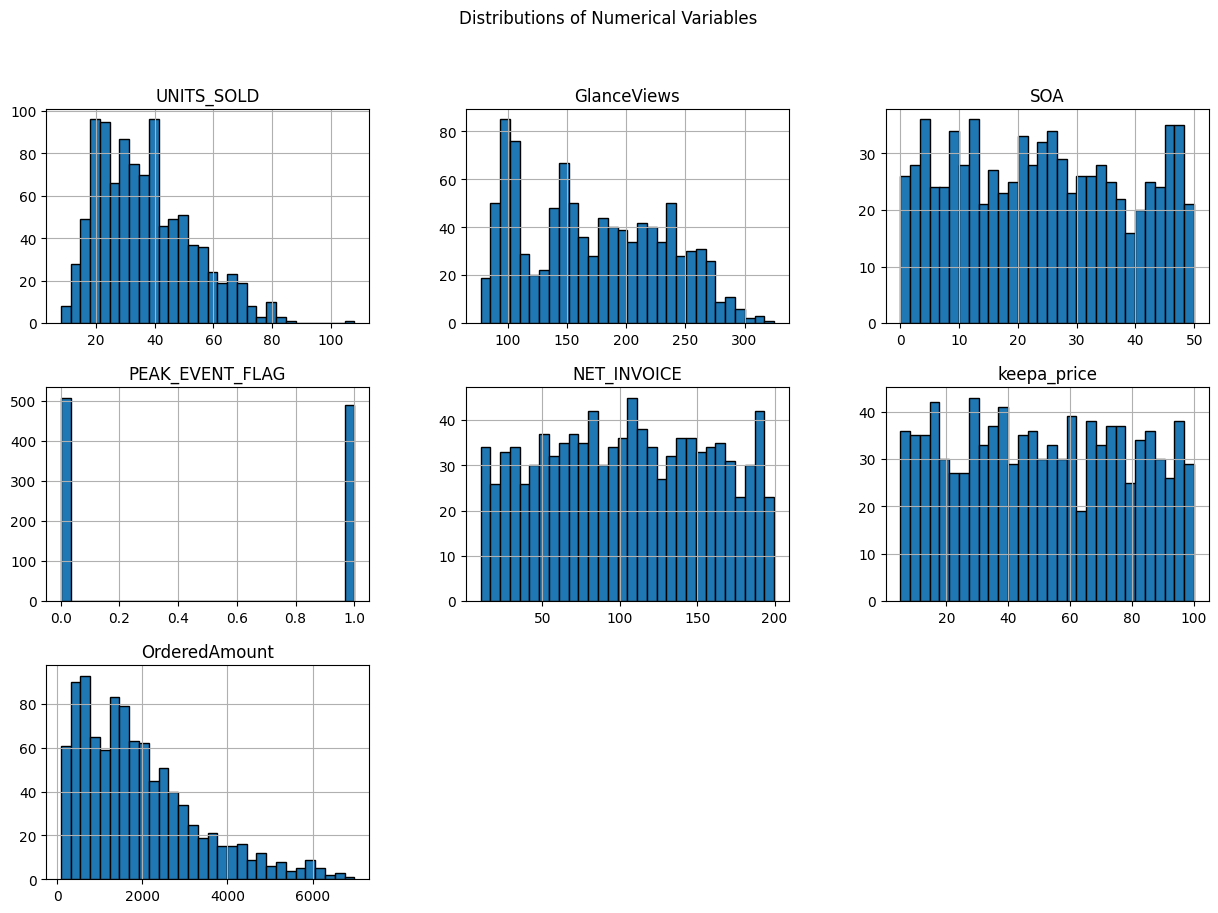

In [69]:
# Plot distributions of numerical variables
numerical_columns = df.select_dtypes(exclude=['object', 'datetime64[ns]']).columns
df[numerical_columns].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Distributions of Numerical Variables')
plt.show()

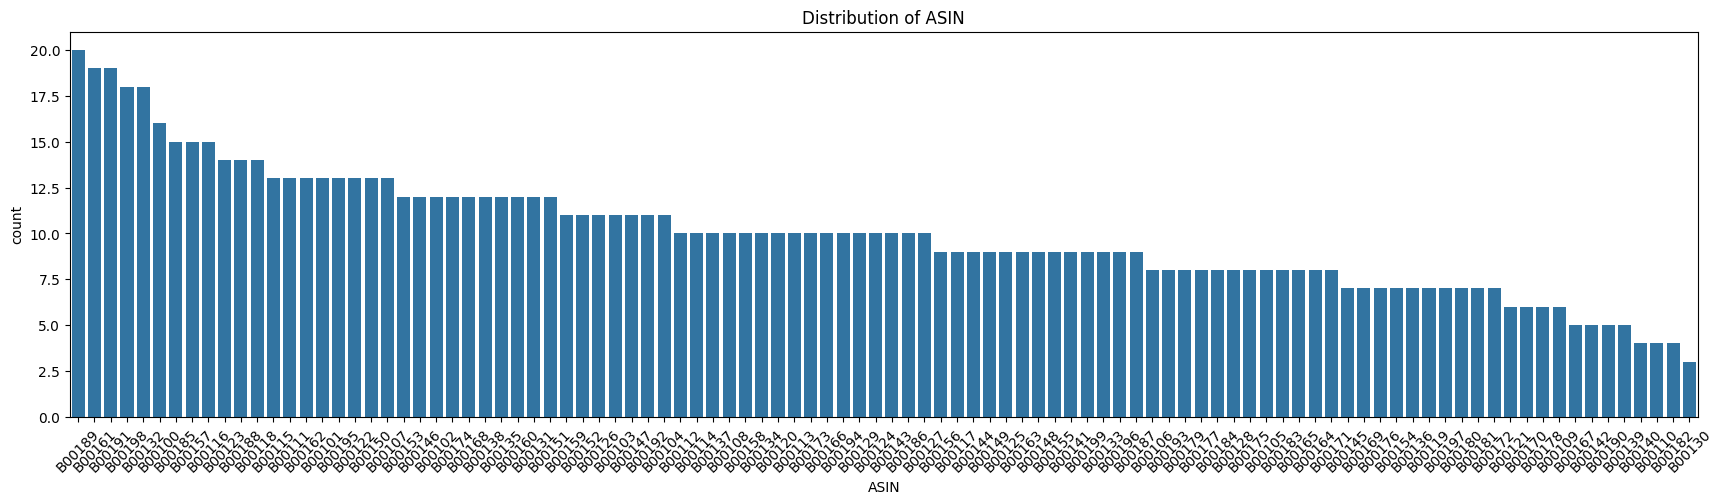

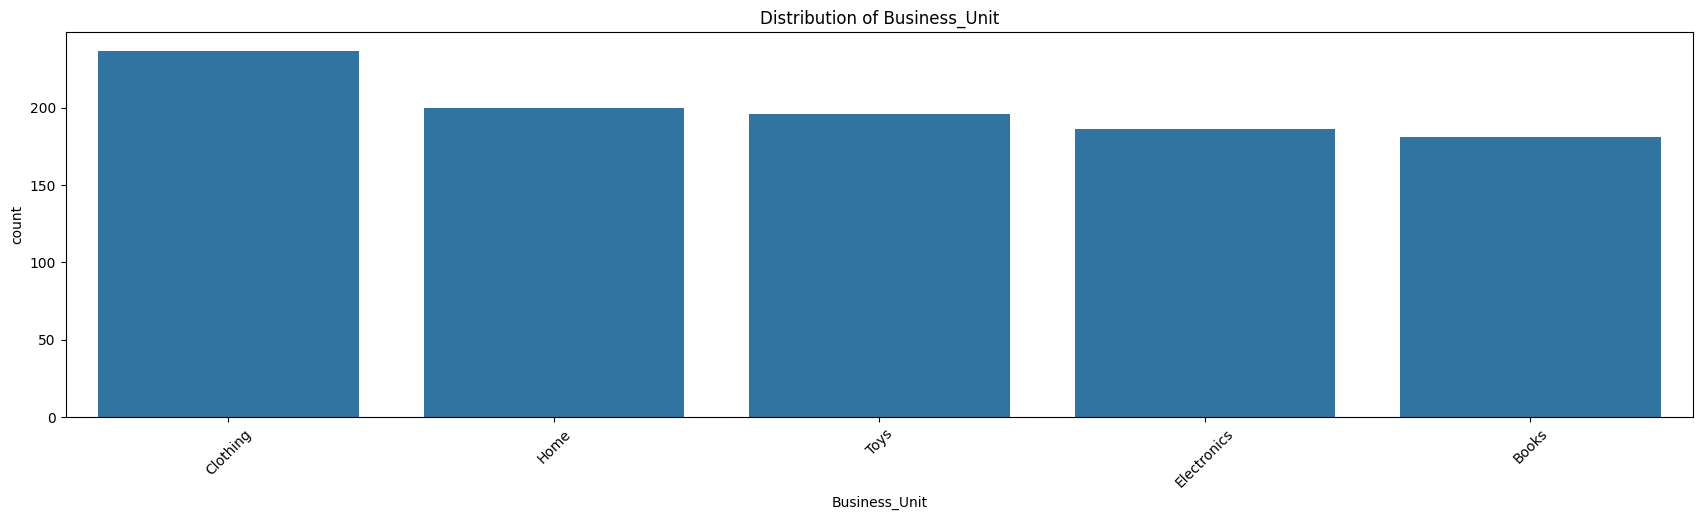

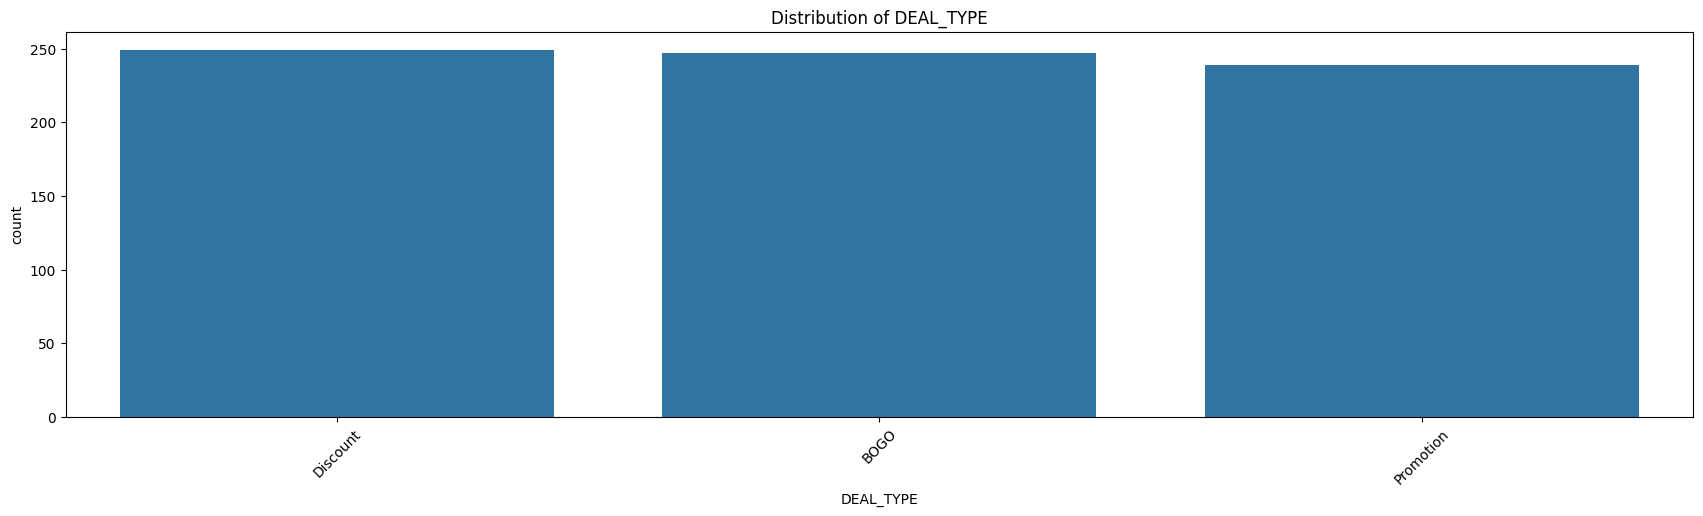

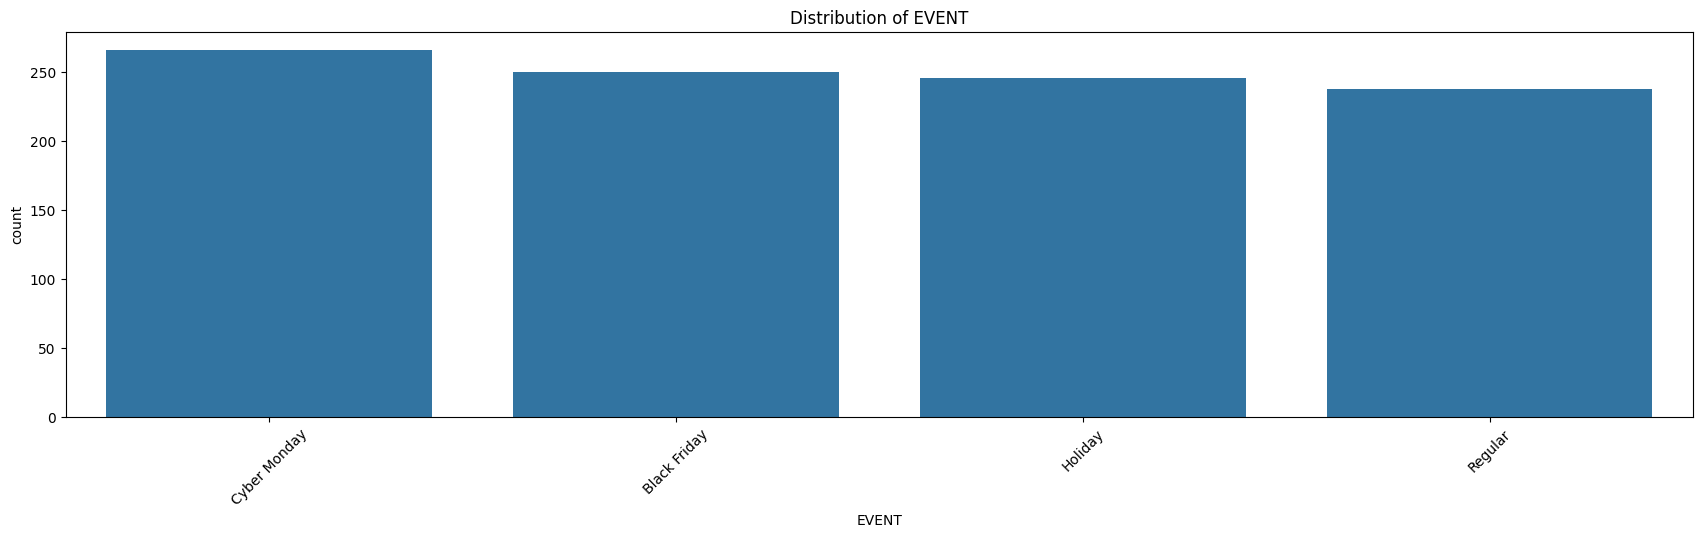

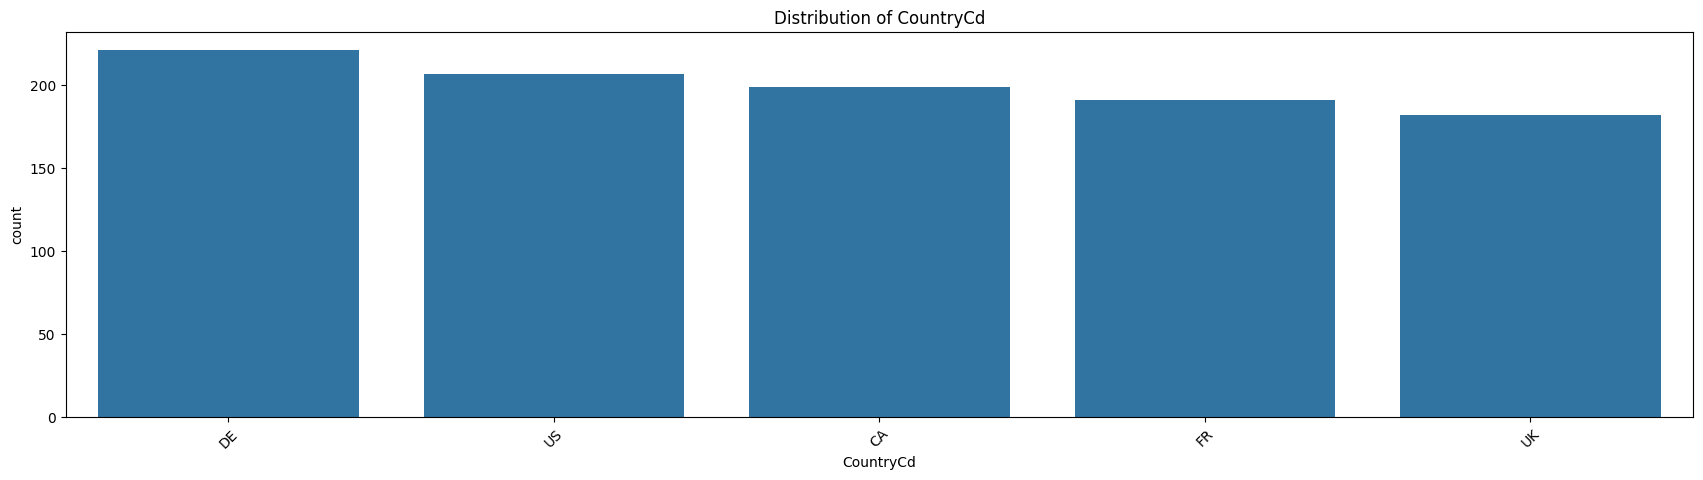

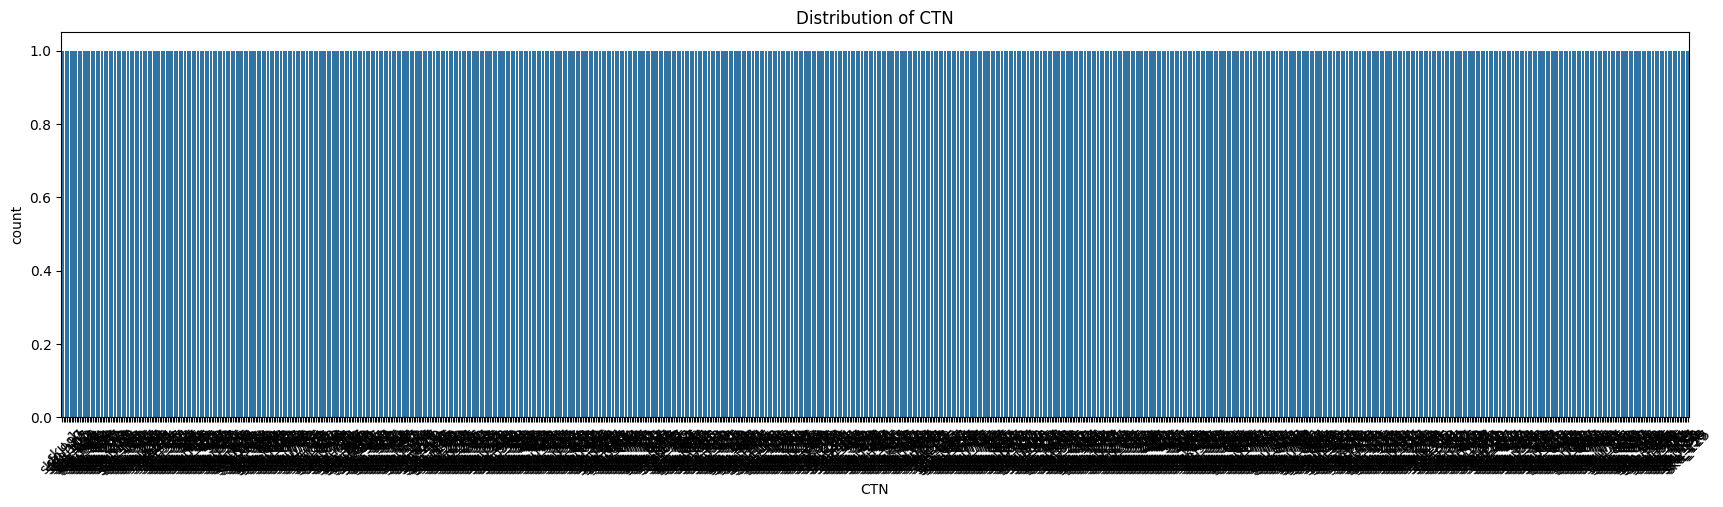

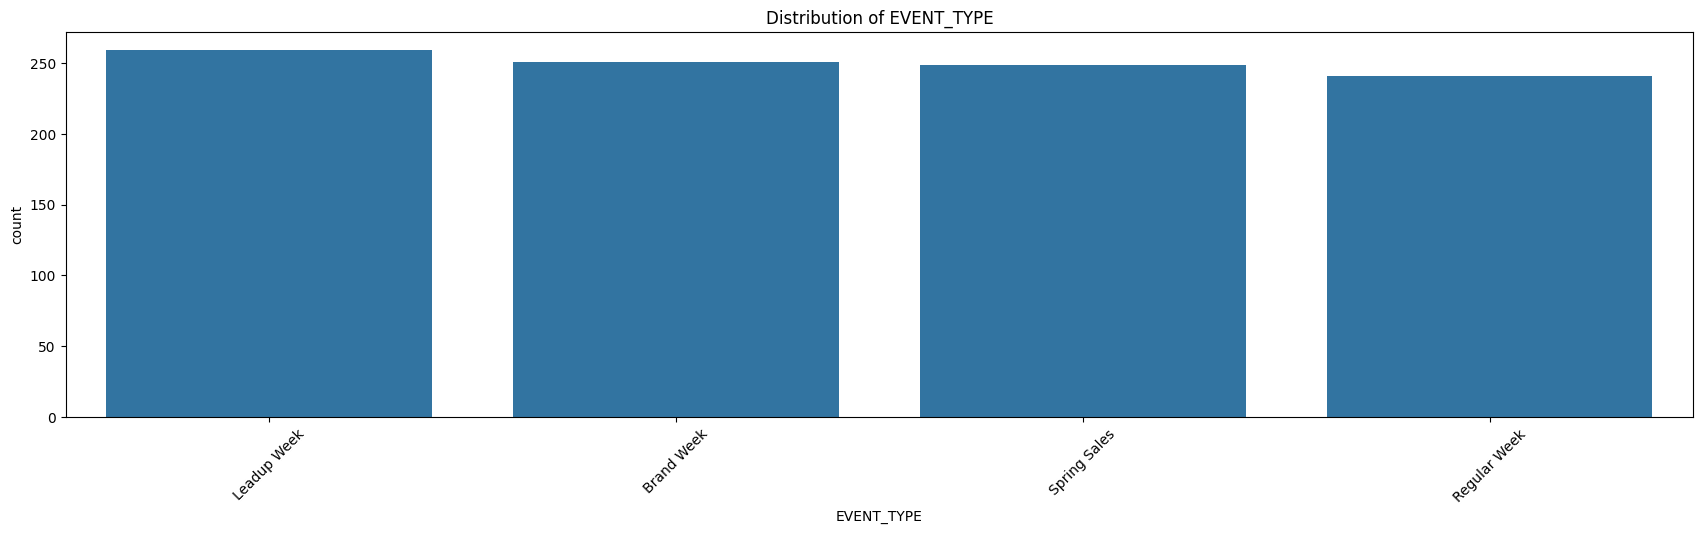

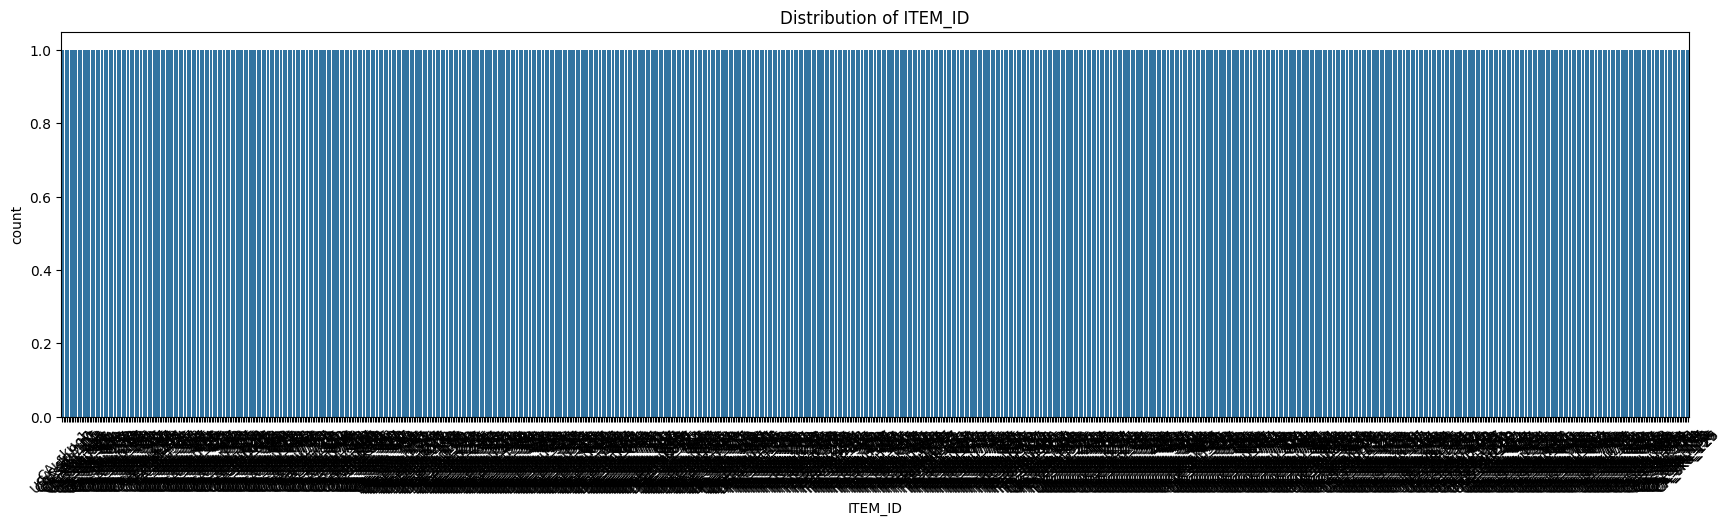

In [70]:
# Plot distributions of categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(21, 5))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

#### Correlation [association] maps

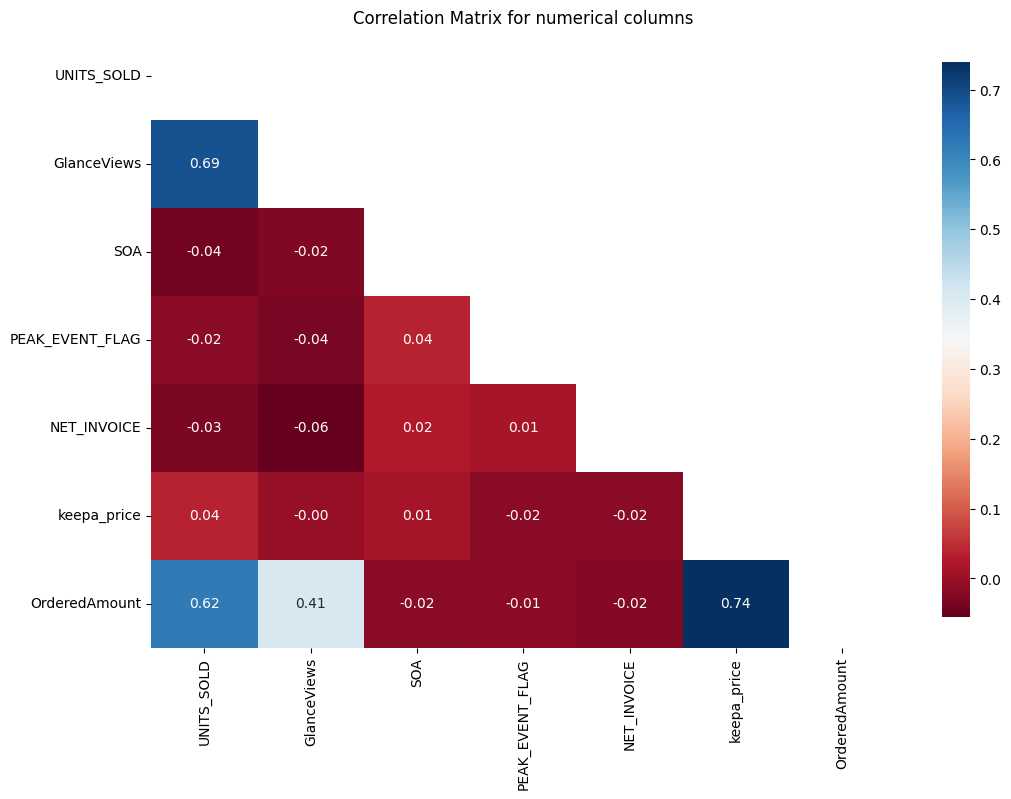

In [71]:
# Assuming 'df' is your DataFrame and 'numerical_columns' is defined
corr_matrix = df[numerical_columns].corr()

# Create a mask to display only the upper triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
# Apply the mask by setting the 'mask' parameter
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f",
            cmap='RdBu',cbar_kws={"shrink": .9})
plt.title('Correlation Matrix for numerical columns')
plt.show()

#### Bi-variate analysis

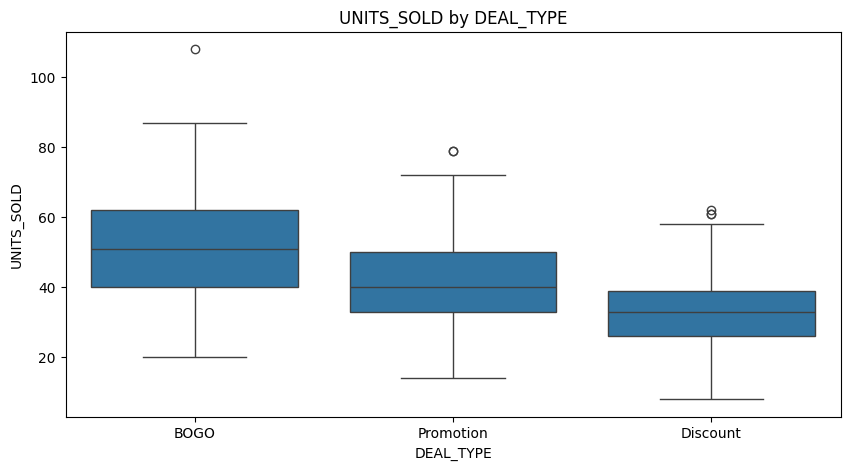

In [72]:
# Relationship between DEAL_TYPE and UNITS_SOLD
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='DEAL_TYPE', y='UNITS_SOLD')
plt.title('UNITS_SOLD by DEAL_TYPE')
plt.show()

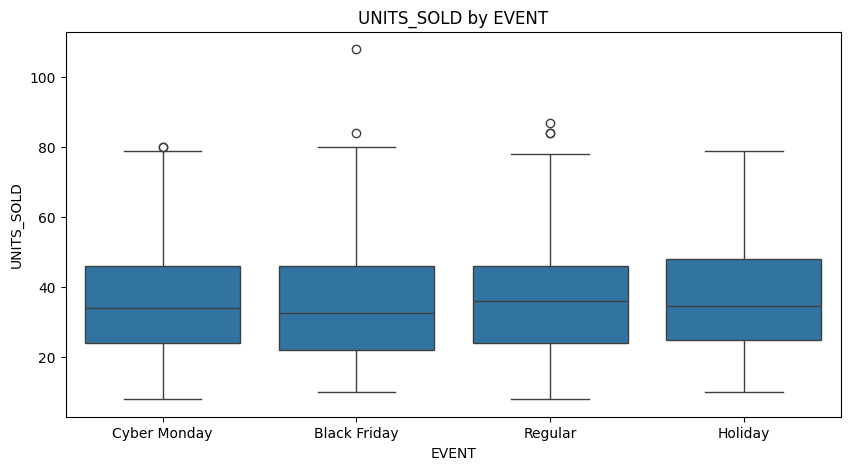

In [73]:
# Relationship between EVENT and UNITS_SOLD
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='EVENT', y='UNITS_SOLD')
plt.title('UNITS_SOLD by EVENT')
plt.show()

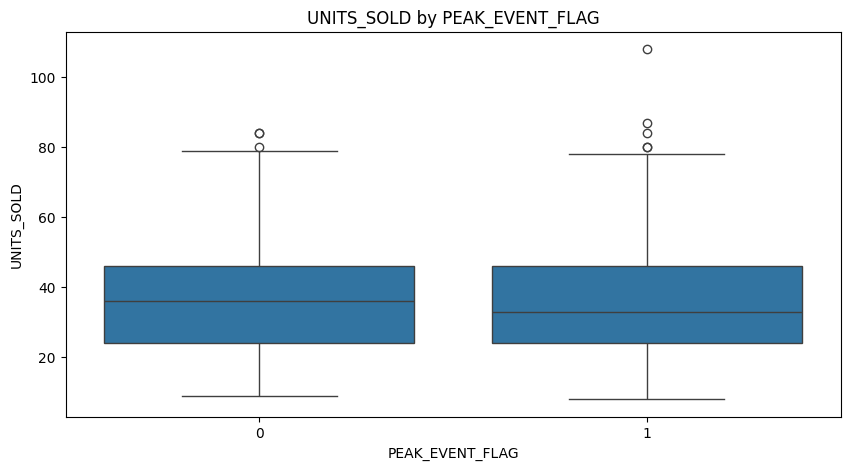

In [74]:
# Relationship between PEAK_EVENT_FLAG and UNITS_SOLD
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='PEAK_EVENT_FLAG', y='UNITS_SOLD')
plt.title('UNITS_SOLD by PEAK_EVENT_FLAG')
plt.show()

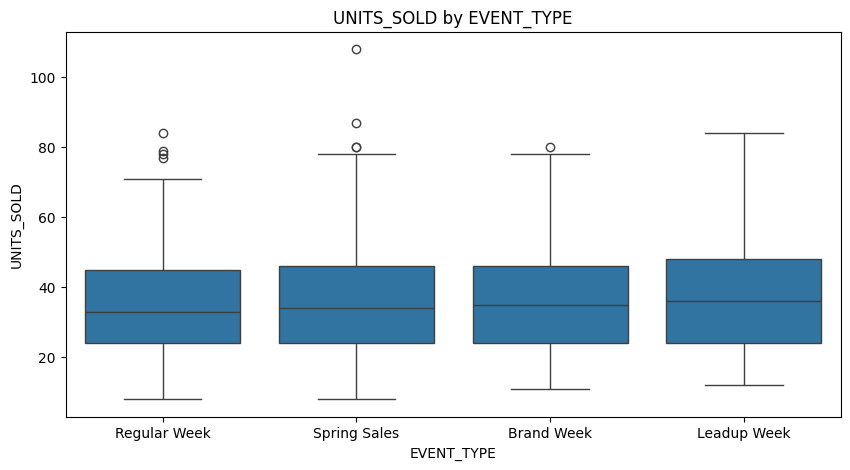

In [75]:
# Relationship between EVENT_TYPE and UNITS_SOLD
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='EVENT_TYPE', y='UNITS_SOLD')
plt.title('UNITS_SOLD by EVENT_TYPE')
plt.show()

<Axes: xlabel='ITEM_ID', ylabel='UNITS_SOLD'>

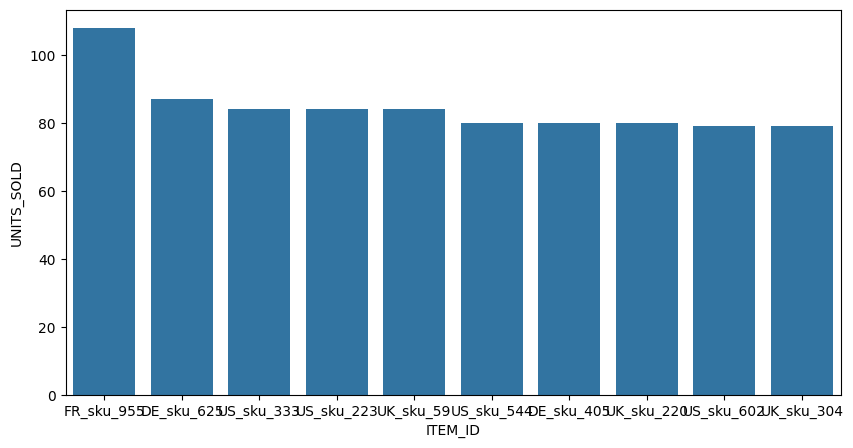

In [76]:
# group by ITEM_ID and sum the UNITS_SOLD
item_units_sold = df.groupby('ITEM_ID')['UNITS_SOLD'].sum().reset_index()
item_units_sold = item_units_sold.sort_values(by='UNITS_SOLD', ascending=False)
# plot the top 10 items by UNITS_SOLD
plt.figure(figsize=(10, 5))
sns.barplot(data=item_units_sold.head(10), x='ITEM_ID', y='UNITS_SOLD')


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'item_units_sold' contains unique ITEM_IDs
unique_items = item_units_sold['ITEM_ID'].unique()
unique_items


array(['FR_sku_955', 'DE_sku_625', 'US_sku_333', 'US_sku_223',
       'UK_sku_59', 'US_sku_544', 'DE_sku_405', 'UK_sku_220',
       'US_sku_602', 'UK_sku_304', 'UK_sku_247', 'CA_sku_642',
       'DE_sku_873', 'DE_sku_87', 'CA_sku_153', 'US_sku_901',
       'DE_sku_843', 'CA_sku_699', 'US_sku_68', 'UK_sku_173',
       'CA_sku_207', 'UK_sku_126', 'DE_sku_133', 'UK_sku_202',
       'US_sku_154', 'FR_sku_165', 'DE_sku_510', 'US_sku_40',
       'CA_sku_450', 'US_sku_355', 'UK_sku_99', 'DE_sku_633',
       'UK_sku_188', 'US_sku_824', 'UK_sku_494', 'FR_sku_673',
       'UK_sku_957', 'UK_sku_799', 'FR_sku_271', 'US_sku_768',
       'US_sku_416', 'UK_sku_187', 'CA_sku_195', 'UK_sku_493',
       'FR_sku_817', 'CA_sku_601', 'DE_sku_132', 'US_sku_13',
       'UK_sku_577', 'US_sku_400', 'FR_sku_55', 'US_sku_969',
       'US_sku_109', 'FR_sku_305', 'DE_sku_338', 'DE_sku_318',
       'US_sku_614', 'CA_sku_421', 'US_sku_803', 'DE_sku_668',
       'DE_sku_372', 'US_sku_997', 'DE_sku_329', 'CA_sku_102',